<a href="https://colab.research.google.com/github/khipucode/data_and_codes_phd/blob/main/3_3_1_2_headmap_SD_DD_MZM_fig_3_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

19
[2, 1, 2, 11, 2, 1, 11]
[[0.345, 0.33, 0.317, 0.304, 0.292, 0.282, 0.272, 0.263, 0.255, 0.247, 0.24, 0.232, 0.225, 0.218, 0.212, 0.206, 0.2, 0.196, 0.193, 0.191, 0.19, 0.19, 0.19, 0.191, 0.192, 0.193, 0.193, 0.193, 0.192, 0.191, 0.189, 0.187, 0.184, 0.182, 0.179, 0.177, 0.174, 0.172, 0.17, 0.168, 0.167, 0.165, 0.164, 0.163, 0.161, 0.161, 0.16, 0.16, 0.16, 0.16, 0.161, 0.163, 0.165, 0.167, 0.169, 0.171, 0.173, 0.174, 0.176, 0.177, 0.178, 0.178, 0.178, 0.178, 0.177, 0.177, 0.176, 0.176, 0.175, 0.175, 0.175, 0.174, 0.174, 0.174, 0.173, 0.173, 0.172, 0.172, 0.172, 0.171, 0.171, 0.171, 0.171, 0.172, 0.172, 0.172, 0.173, 0.174, 0.174, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175], [0.33, 0.317, 0.304, 0.293, 0.283, 0.274, 0.265, 0.258, 0.25, 0.243, 0.236, 0.229, 0.222, 0.215, 0.208, 0.201, 0.195, 0.19, 0.185, 0.182, 0.18, 0.178, 0.177, 0.177, 0.177, 0.177, 0.177, 0.176, 0.175, 0.174, 0.172, 0.17, 0.167, 0.165, 0.163, 0.161, 0.159, 0.158, 0.157, 0.155, 0.154, 0.153, 0.152, 0.151, 0.151, 0.15, 

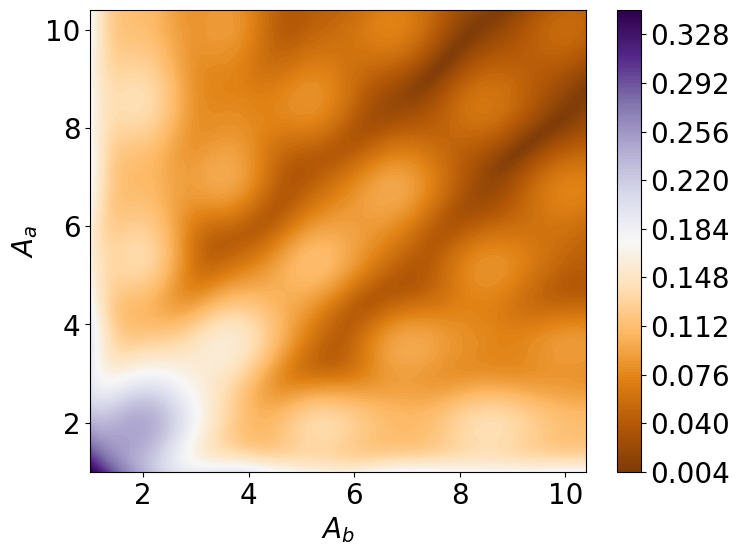

In [ ]:
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel function
import matplotlib.pyplot as plt
#from pylab import *


# Parâmetros dos moduladores
Vpi_pm1  = 3
Vpi_mz1  = 2.4

ts5 = 2*math.sqrt(5)  # 4.47213

# Potências de entrada em dBm nas portas dos moduladores
Ppm1  = 23;  ang1pm = 0;  Upm1   =  0;     Tpm1  =  (pi*Upm1/Vpi_pm1);    Apm1  = (pi/Vpi_pm1)*10**(Ppm1/20)/ts5

# ------------------------------------No condition
#Pmz1a = 33;  ang1a  = 0;  Umz1a  =  0;   Th1a  =  (pi*Umz1a/Vpi_mz1);   Amz1a = (pi/Vpi_mz1)*10**(Pmz1a/20)/ts5
#Pmz1b = 32;  ang1b  = 0;  Umz1b  =  0;     Th1b  =  (pi*Umz1b/Vpi_mz1);   Amz1b = (pi/Vpi_mz1)*10**(Pmz1b/20)/ts5;
# ------------------------------------MZM flat condition
Pmz1a    = 33;  ang1a  = 0;  Umz1a  =  Vpi_mz1/2;   Th1a  =  (pi*Umz1a/Vpi_mz1);   Amz1a = (pi/Vpi_mz1)*10**(Pmz1a/20)/ts5
Nao_used = 10;  ang1b  = 0;  Umz1b  =  0;           Th1b  =  (pi*Umz1b/Vpi_mz1);   Amz1b = Amz1a - pi/2;
#-------------------------------------

up_n  =  55
up_m  =  67
noise = 10**-10; noise_dBm = 10*log10(noise)

#===============================================================================
#ang1a_n = np.arange(0,pi,0.1)
#f_x     = np.sin(ang1a_n)

#print(ang1a_n)
top_m = int((up_m-1)/2)
ind_m = range(-top_m,top_m+1)

# ===========================================================================

bot_Amz1a = 1;  top_Amz1a =  10.5;   ax_Amz1a = np.arange(bot_Amz1a, top_Amz1a, 0.1)  # top value of Amza LIMITES BRAZO A
bot_Amz1b = 1;  top_Amz1b =  10.5;   ax_Amz1b = np.arange(bot_Amz1b, top_Amz1b, 0.1)  # top value of Amzb LIMITES BRAZO B

len_mza = len(ax_Amz1a)
len_mzb = len(ax_Amz1b)

ima = 0
imb = 0

# ===========================================================================

def reduct_vector(up_act, vec_comb, up_new):
 # up_act = tamanho atual do vector vec_comb
 a = int((up_act-up_new)/2)
 b = int(a + up_new)
 c = int((up_new-1)/2)
 ax_rang = range(-c,c+1)
 ax_new = list(ax_rang)
 new_vcomb = []
 for k in range(a,b):
  new_vcomb.append(vec_comb[k])

 return new_vcomb
# ===========================================================================

b = [1,2,1,1,1,1,2,1,2,11,2,1,11,1,2,2,3,3,0]
print(len(b))

b1 = reduct_vector(19,b,7)
print(b1)

up_act      = up_m
length_flat = 11     # quantidade de linhas comparadas

#len_npm = len(ax_Apm1)
len_mza = len(ax_Amz1a)
len_mzb = len(ax_Amz1b)
mx_st = [[0 for i in range(len_mzb)] for i in range(len_mza)]

#length_matrix = 20 # tamanho maixmo da voltagem multiplicado x 10 em V
#limit_axis_xy = length_matrix/10
#mx_st = [[0 for k in range(length_matrix)] for j in range(length_matrix)]
#mx_st = np.zeros((length_matrix, length_matrix))

for var_Amz1a in ax_Amz1a: #range(length_matrix):     #@@ in ax_Amz1a:  #jAa in y axis
 imb = 0
 for var_Amz1b in ax_Amz1b:  #range(length_matrix):    #@@ in ax_Amz1b:

   # var_Amz1b = var_Amz1a - pi/2;
    Vector_mz = []
    flat_cond = []
    temp2     = []
    pente_osa = []

    for m in ind_m:
      J_m_Amz1a = besselj(m,var_Amz1a)
      J_m_Amz1b = besselj(m,var_Amz1b)
      temp = J_m_Amz1a*exp(j*(m*ang1a + Th1a)) + J_m_Amz1b*exp(j*(m*ang1b + Th1b))
      Vector_mz.append(temp)

    temp2 = [abs(k2) for k2 in Vector_mz]
    pente_osa = np.square(temp2)
    flat_cond = reduct_vector(up_act, pente_osa, length_flat)
    st_dev = np.std(flat_cond)

    #mx_st[var_Amz1a,var_Amz1b]= st_dev
    mx_st[ima][imb] = round(st_dev,3)

    imb = imb + 1
 ima = ima + 1


#x  = list(range(length_matrix))
#y  = list(range(length_matrix))

#ax_1 = np.linspace(0,limit_axis_xy,length_matrix)
#ay_1 = np.linspace(0,limit_axis_xy,length_matrix)

#plt.rcParams['font.size']=20
#plt.figure(figsize=(12,8))
#plt.contourf(ax_1, ay_1, mx_st, 200, cmap='PuOr')
#plt.colorbar();
#plt.xlabel("$A1_a$", fontsize=20)
#plt.ylabel("$A1_b$", fontsize=20)
#plt.savefig('grafico_MZM.pdf')
#----------------------------------------------------------------------------------------------------
#_________________________________PRINT FIGURA_________________________________
#H0 = m_3d_std[0][:][:]  # Um plano da matriz 3d m_3d_std
#plt.rcParams['font.size']=20
#plt.figure(figsize=(8,5))
#plt.contourf(ax_Amz1b, ax_Amz1a, mx_st, 20, cmap='PuOr')
#plt.ylabel('Aa')
#plt.xlabel('Ab')
#plt.colorbar()

#print(len(ax_Apm1))
# COLOR LEVEL COURVES https://matplotlib.org/stable/tutorials/colors/colormaps.html
#print(ax_Apm1)

#x1,y1 = np.meshgrid(ax_Amz1a, ax_Amz1b)
#plt.contour(x1,y1,mx_st)

#H12 = mx_st[:][:]  # Um plano da matriz 3d m_3d_std
plt.figure(figsize=(8,6))
plt.contourf(ax_Amz1b, ax_Amz1a, mx_st, 200, cmap='PuOr')   # cmap = RdGy
plt.ylabel('$A_a$')
plt.xlabel('$A_b$')
plt.colorbar()




#ax_mz = list(range(up_m))

print(mx_st)